In [55]:
from IPython.display import display, Math, Latex

In [56]:
%%latex
\begin{aligned}
y = Hx + e
\end{aligned}
$$
\begin{aligned}
degraded(i,j) = H[original(i,j)] + noise
\end{aligned}
$$

<IPython.core.display.Latex object>

**y**: "observations" , m-sized vector  
**x** : "unknown orig image", n-sized vector  
**H**: "degradation matrix", (linear?) system operator m x n sized (e.g. denoising, inpainting, deblurring, etc... transform operator/function)  
**e** : "noise vector", variables are **statistically indep** (P(AB) = P(A)P(B)) AND from the **same Standard Gaussian PDF** (Standard deviation 'e' seen in equations relates to this noise function/vector)
![image_Restoration_model](https://images.slideplayer.com/26/8267441/slides/slide_5.jpg)

Perhaps the most appealing property of the proposed strategy is its minimal parameter tuning.Specifically, for the noisy inpainting problem, our method has a single parameter that can be just set to zero, and for the deblurring problem we suggest an automatic parameter tuning scheme that can be employed.

Cost functions ~ Loss functions

The image model prior, denoted as s(x), represents our prior knowledge or beliefs about the properties of the true image x that we are trying to estimate from the observed or degraded image y; s(x) allows us to leverage additional information, constraints and intial basis beyond what we have in y.
s(x) captures the regularities, patterns, and constraints that we expect to hold true for presumed natural images. These priors are often based on statistical properties, perceptual considerations, or domain-specific knowledge about the structure of images. 

In [90]:
%%latex
\begin{aligned}
f(\tilde{x}) &= \frac{1}{2\sigma_e^2}*||y - \bold{H}\tilde{x}||_2^2 + s(\tilde{x})  ~\;\; \scriptsize(\text{general}) \\
             &\implies min[\ell(\tilde{x}) + \beta s(\tilde{v})]  ~\;\; \scriptsize(\text{PnP, see paper refs})
\end{aligned}
$$
\begin{aligned}
lossfunc(i,j) &= gaussconst*(degraded - estimateReconstructed) + betaParam*prior \\
              &= dataFidelityTerm + regularizationTerm 
\end{aligned}
$$

<IPython.core.display.Latex object>

P&P Framework proposes general recovery strategy and optimizations instead of making a complete algorithm to solve the above min(f(x_tilde)) for each type/operations of H matrices.
> *P&P baselines:  (see refs 32 (ADMM with augmented lagrangian) and 15, as well as resources at refs 1,2,3... )*

In [96]:
%%latex
\begin{aligned}
f(\tilde{x}) &\equiv \frac{1}{2\sigma_e^2}*||\bold{H^{\dagger}}y - \tilde{x}||_{H^T H}^2 + s(\tilde{x})  ~\;\; \scriptsize(\text{general base for paper's method}) \\
             &\implies min[f(\tilde{x})]  ~\;\; \scriptsize(\text{See next equation block for proper estimator})
\end{aligned}
$$
\begin{aligned}
lossfunc(i,j) &= gaussconst*(transformedObservedData - reconstructed) + prior \\
              &= dataFidelityTerm*possibleDegeneracy + regularizationTerm 
\end{aligned}
$$

<IPython.core.display.Latex object>

The pseudo inverse of a full row rank matrix H m x n (m = rank < n) is a generalized form of the inverse of H that respects Moore-Penrose conditions. It is the product of its tranpose with the inverse of a symmetric matrix H H^T.  

positive definite matrix: all its eigen values are positive ; "well behaved"; vectors transformed by the matrix presever their length and direction

H^T H is nxn and H H^T is mxm ... symmetric square matrix

H^T H has a non-trivial null space meaning exists x != 0 such that Hx = 0 signifying that this **transformation on fidelity term ignores certain dimensions/components** of the H^T H vector space and thus the homogenous system Hx = 0 may lead to redundancy because there may be various different solutions. the seminorm of H^T H may be negative or nondefinite, as it is a generalized form that indicates magnitude of the vector/tensor its measuring "relative" to the H^T H basis. 

[1] To avoid degeneracy because of ignored components and to make a more pratical optimization problem, the semi norm is replaced by a L2 norm and a design parameter 'delta' is included as a uncertainty/delta design parameter.
The gaussian constant is thus now: 1/2(sigma_e + delta)^2

[2] the delta parameter may make the numerical effect/amplitude of the data fidelity term ill-conditionned in certain cases if it is not picked adequaltely. 
To have a stable distribution and proper statistical estimators for x and y, minimize correctly the gaussian constant denominator with respect to delta:

delta = argmin_delta [(sigma_e + delta_tilde)]^2  such that f(x_tilde) >= f_approx(x_tilde)

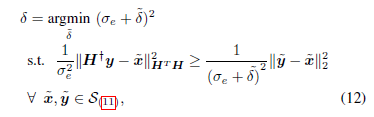

If the (12) LHS and RHS are approximately equal, then a possible solution would be for a transform system H[\tilde{y}] = y:

H^{\dagger}y \equiv \tilde{y}   (LHS and RHS fidelity term equivalence).


Now this solution becomes trivial with delta = 0 as soon as H \equiv I_n since I_n \tilde{y} = \tilde{y} = y. This reduces time and closed-form the original image denoising inverse problem.

Using forms such as (11) and (12) may not only prove a complexity advantage, but some optimization inverse problems in this paper (and its Appendix + reference) were observed to present better numerical approximations results to a true/natural image x with them. 

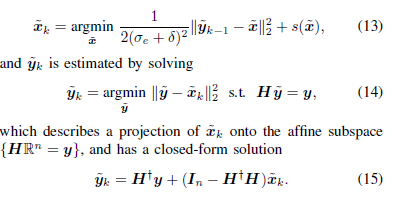

k in subscript indicate the iteration number of the vector of sampled pixel data being estimated (x and y, even though their estimation/computation is much different in usage and definition in the context of our inverse optimization problems).

(13) for x is actually an iterative form that describes a typical denoiser for Gaussian L-1/white noise (that is has the notation D(. ; sigma) in the pseucode algorithm #2 i.e. the main IDBP method). As in P&P, the choice Denoiser and its proper parameterization and regularization is critical depending on datasets as one of the intent if IDBP is to minimize the role/necessity of explicit image priors s(x) (s(x) is compacted implicitely into the denoising operator D, given that it was chosen and setup correctly)

(14) is a projection that estimates the iterated y_k with the eponymous backward projections of x_k onto a linearly affine defined subspace {H[any real tensor of dimension n] = y}. It is a minimization problem that is rooted in numerical methods, but (15) is its closed-form extension.... 

...Where (15) will map a valid linear algebra equation with non-trivial possible solutions that, with proper parameter tuning as seen above, would yield minimal degeneracy with most datasets and their adequately chosen constraints.

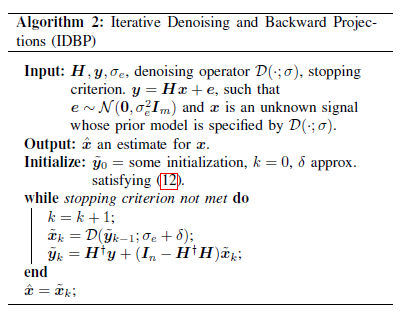


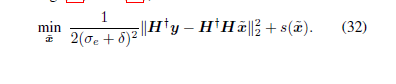

Results of parameter tuning (Inpainting):

The H operator / Image restoration technique we chose was image inpainting as it was more intuitive proofs of concepts to explain the IDBP method of the paper. 

1. **MaxIter**: Represents the stopping criterion. Higher number of iterations can potentially lead to bettered convergence but increase computational time. This number is quite empirical and we can see that for certain image priors (see graphs below) that at some point too many iterations seem to hit a ceiling and don't provide much for the computational time they require.

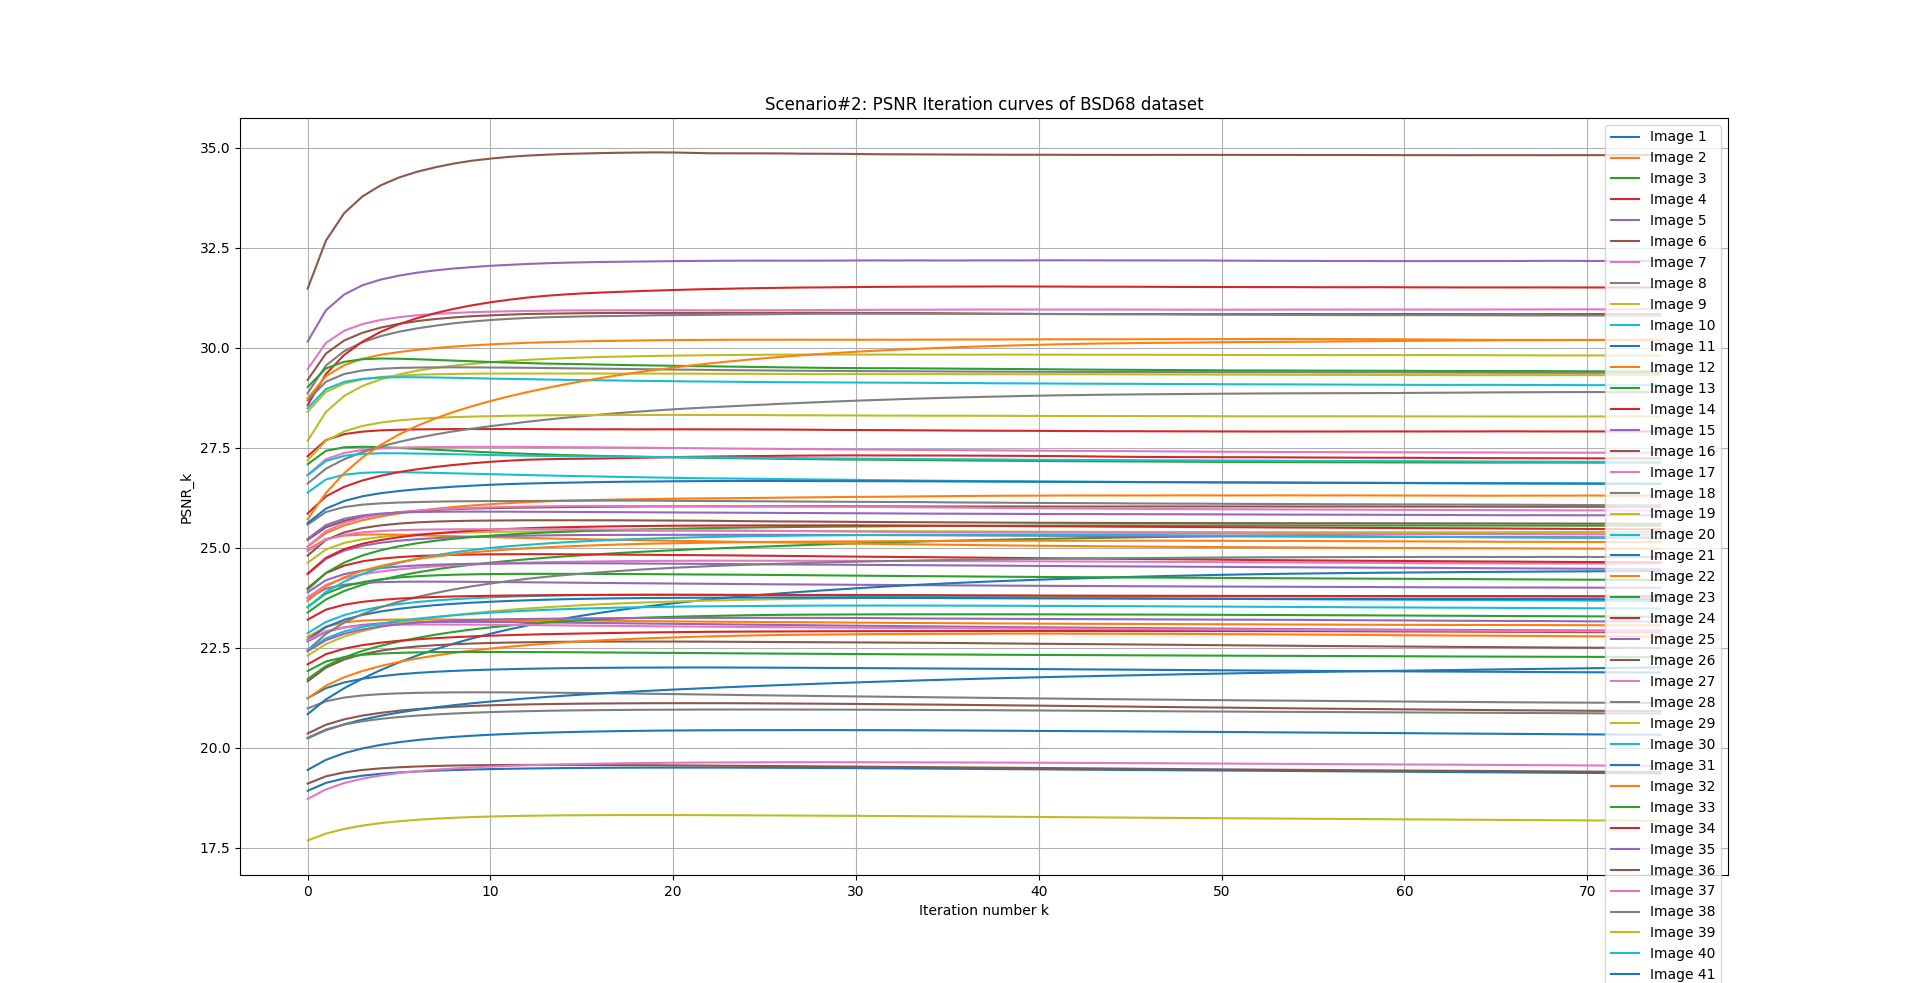

2. **sigma_e**: All noise come from identically distributed random variables that follow a mean=0 Gaussian distrubiton with this parameter as standard deviation. In inpainting, it is inversely proportional to the severity of noise tolerance; e.g. High values will lead to smoother but less 'fidelity term' accurrate, whereas lower values will usually lead to more accurate values of the prior but contain much more uncaught noise artifacts.

*(BSD68 Img#32 Scenarios) Left: low sigma_e = 0 + delta Right: high sigma_e = 10 + delta*
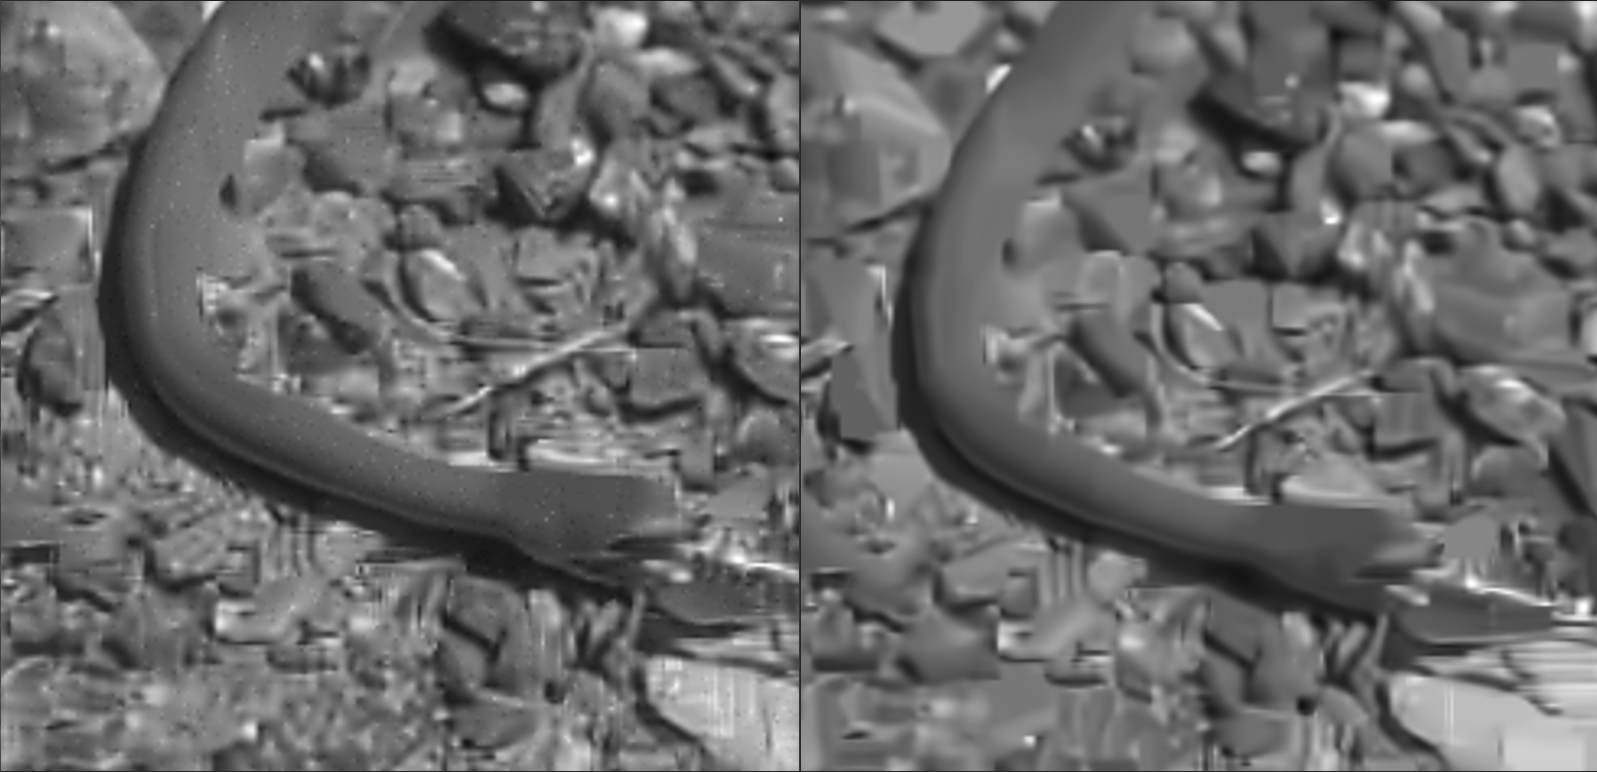

3. **delta**: Sometime estimated with delta_tilde, it is a differential added to sigma_e in the gaussian regularization_term. Within the scope of the revised optimization problems presented in the paper, it helps balance the effects of the fidelity term and the regularization term in numerical methods implementation.

The nature of this delta is very important for the theoritical validity of the method (see previous paragraphs). Its choice must ensure feasibility of estimators and follow the argmin inequation seen before (Eg. 12). In real applications, delta would be empirically adjusted based on results for a given data set, but we simply used standard values given in the paper.

Rejection criterion of iteratively chosen deltas:
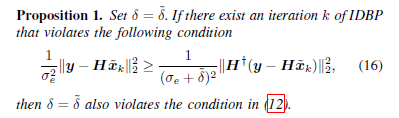